# LetsGrowMoreVIP
Data Science Intern

Paulyna Magana

## Context
Information on more than 180,000 Terrorist Attacks

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

### Intermediate Level Task 1 - Exploratory Data Analysis on Dataset - Terrorism

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import codecs

import warnings
warnings.filterwarnings('ignore')

### Load data

In [29]:
terrorism_data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='iso-8859-1')

In [30]:
terrorism_data.head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [31]:
terrorism_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [32]:
terrorism_data.shape

(181691, 135)

##### Drop columns

In [33]:
#rename columns
terrorism_data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [34]:
#extract columns
terrorism_data=terrorism_data[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

#create a new columns called casualities
terrorism_data['casualities']=terrorism_data['Killed']+terrorism_data['Wounded']
terrorism_data.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [35]:
terrorism_data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

## Analysis

In [36]:
print('Country with Highest Terrorist Attacks:',terrorism_data['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terrorism_data['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terrorism_data['Killed'].max(),'that took place in',terrorism_data.loc[terrorism_data['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


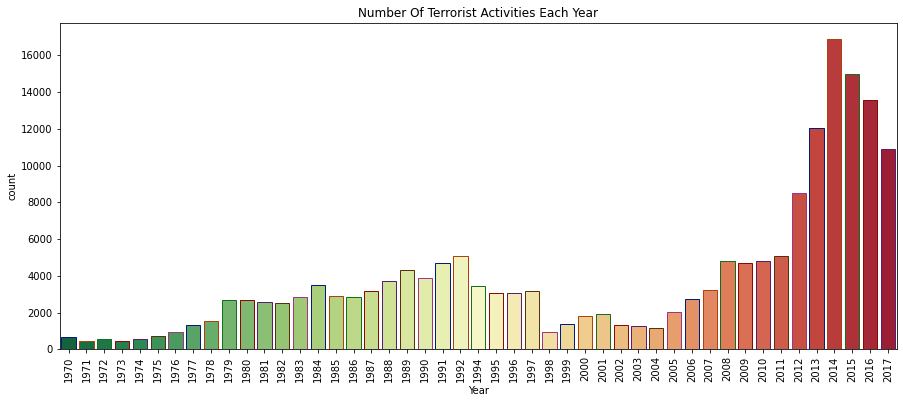

In [37]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terrorism_data,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

The number of terrorist activities have gone up sharply after 2000.

##### Attacking type

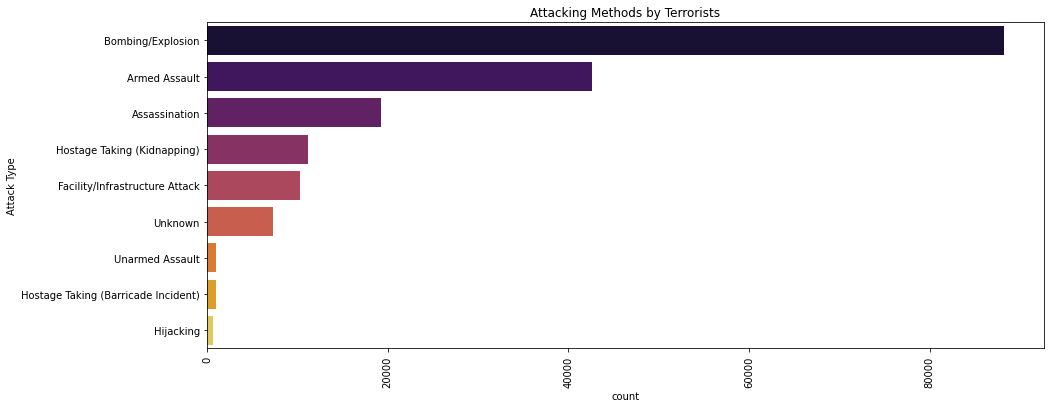

In [38]:
plt.subplots(figsize=(15,6))
sns.countplot(palette='inferno', y=terrorism_data['AttackType'], order=terrorism_data['AttackType'].value_counts().index)
plt.ylabel("Attack Type")
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

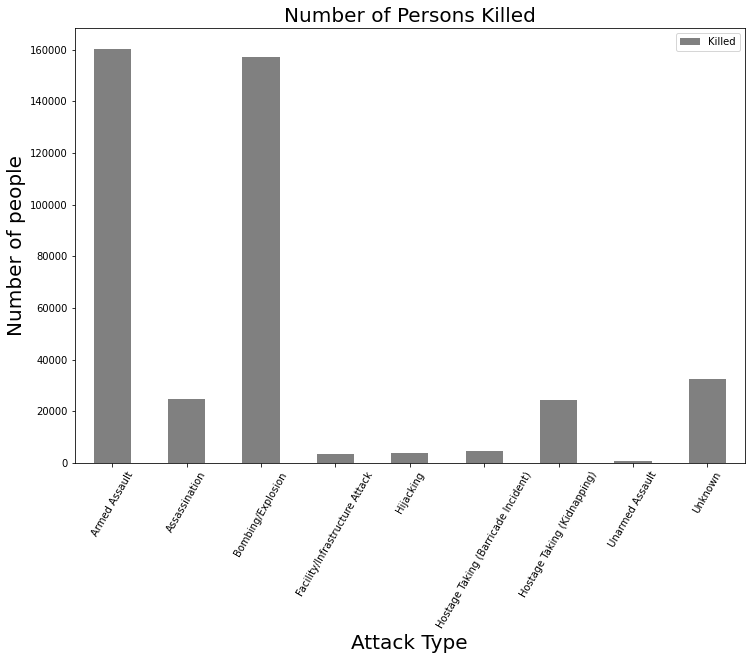

In [77]:
attack = terrorism_data[['AttackType','Killed']].groupby(['AttackType']).sum().plot(kind='bar',figsize=(12,8), color="grey")
plt.title('Number of Persons Killed', fontsize='20')
plt.xlabel('Attack Type', fontsize='20')
plt.ylabel('Number of people', fontsize='20')
plt.xticks(rotation='60')
plt.show()

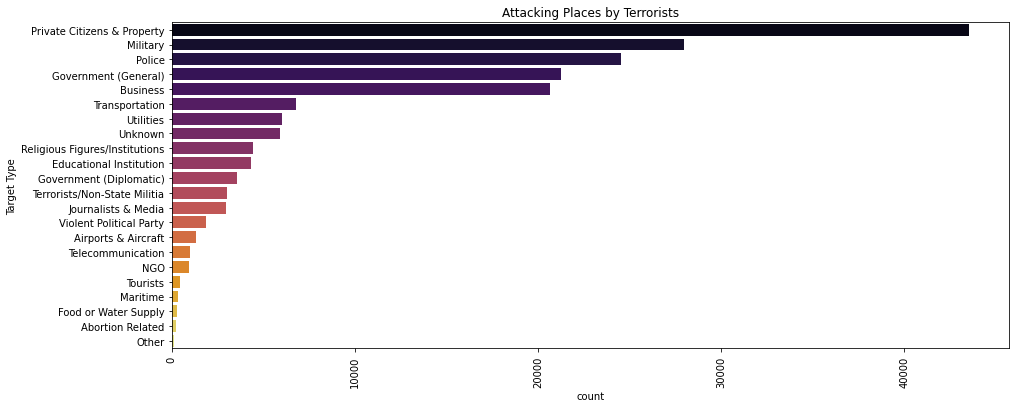

In [39]:
plt.subplots(figsize=(15,6))
sns.countplot(palette='inferno', y=terrorism_data['Target_type'], order=terrorism_data['Target_type'].value_counts().index)
plt.ylabel("Target Type")
plt.xticks(rotation=90)
plt.title('Attacking Places by Terrorists')
plt.show()

#### Global attacks

#### Terrorism by Region

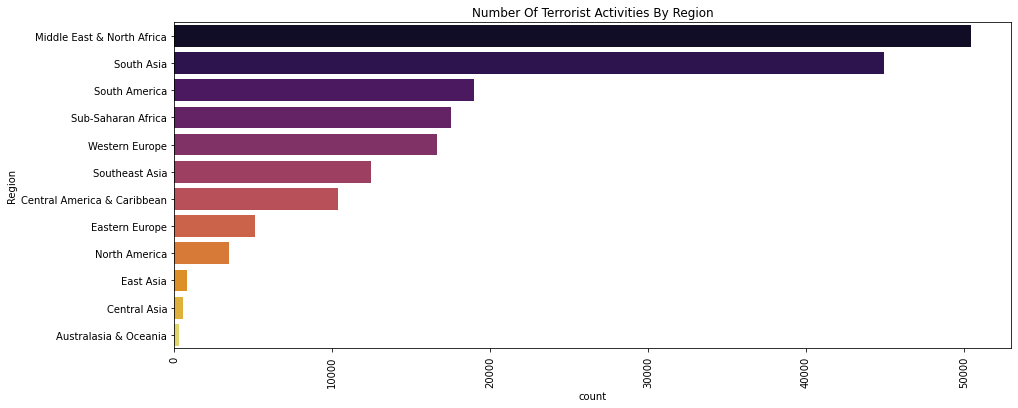

In [40]:
plt.subplots(figsize=(15,6))
sns.countplot(palette='inferno', y=terrorism_data['Region'], order=terrorism_data['Region'].value_counts().index)
plt.ylabel("Region")
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

Middle East and North Africa are the most terrorism prone regions followed by South Asia. The Australian Region have experienced very few terrorist events. Collectively we can say that The African and Asian Continent experience the highest terrorist attacks. But why are these regions prone to terrorism? Does this have any relation to the mindset of the people? or any other reason??

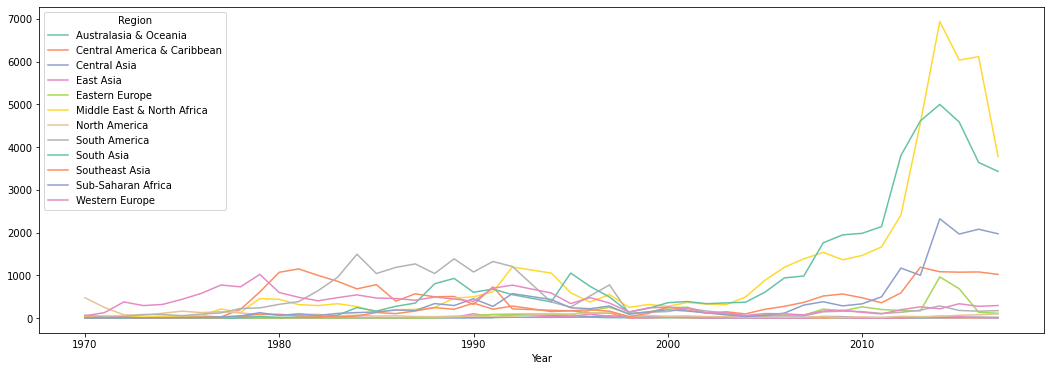

In [41]:
terror_region=pd.crosstab(terrorism_data.Year,terrorism_data.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

As seen already, Middle-East,North Africa,South Asia have seen a shoot in the number of terrorist activities over the years.

#### Terrorism by Country

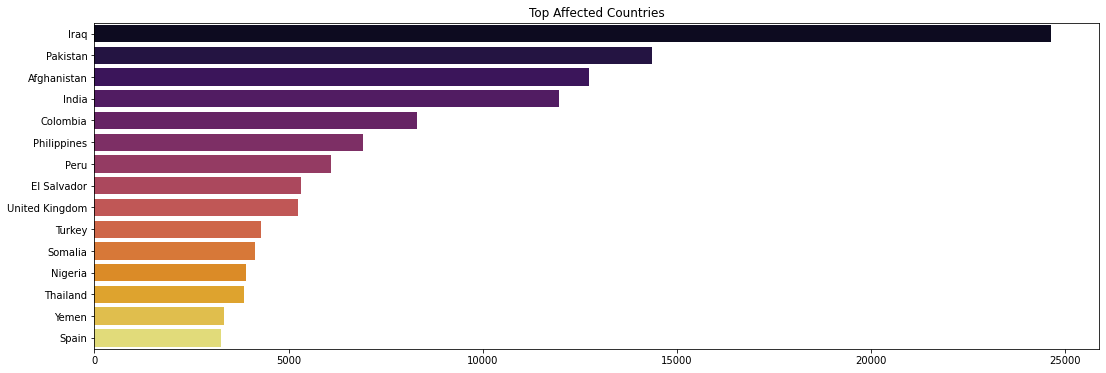

In [42]:
plt.subplots(figsize=(18,6))
sns.barplot(y= terrorism_data['Country'].value_counts()[:15].index, x=terrorism_data['Country'].value_counts()[:15].values, palette='inferno')
plt.title('Top Affected Countries')
plt.show()

In [50]:
terrorism_data['Country'].value_counts().head(15)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

### Most notorious Groups

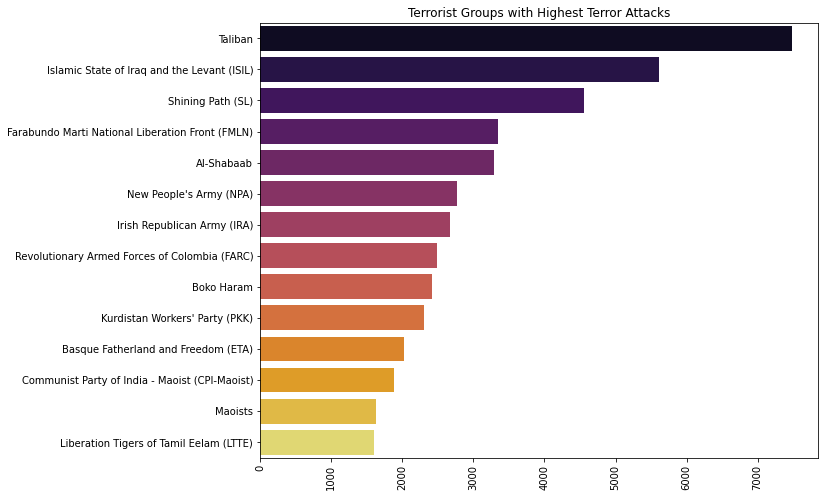

In [43]:
sns.barplot(terrorism_data['Group'].value_counts()[1:15].values,terrorism_data['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

##### Activity of Top Terrorist Groups

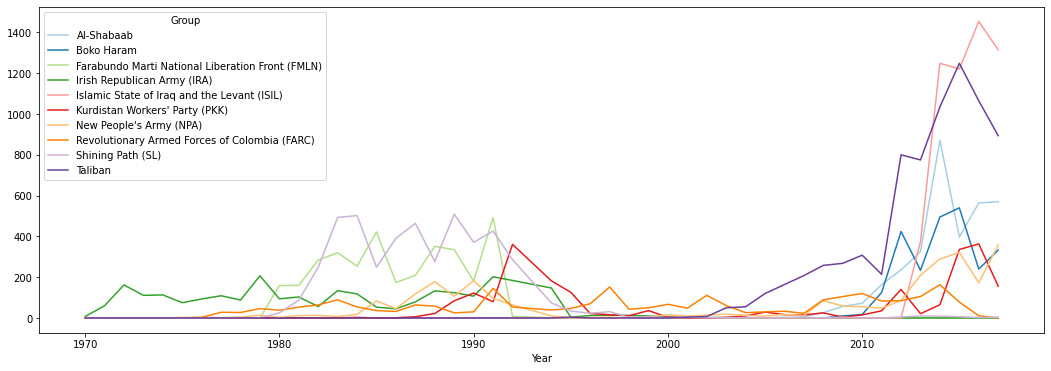

In [44]:
top_groups10=terrorism_data[terrorism_data['Group'].isin(terrorism_data['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

The Irish Republican Army(IRA), is the oldest terrorist group started back in the 1960-1970, maybe after the World War 2 due to the mass killing. However, it has probably stopped its activities in the late 90's. Some of the groups that have started lately in 2000's like the ISIL and Taliban, have shown a shoot in the number of attacks in the past years.

#### United Kingdom

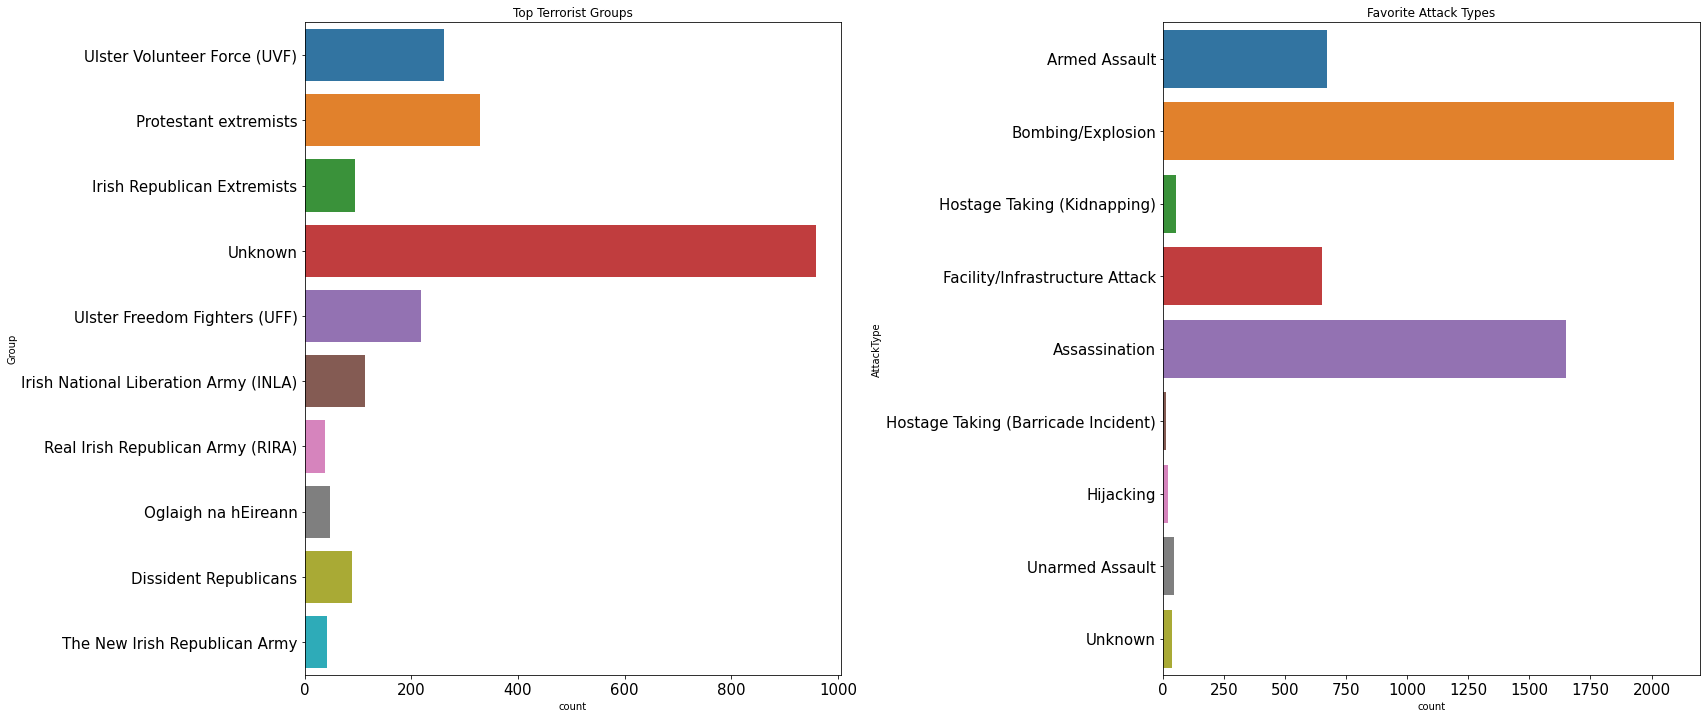

In [45]:
terror_uk=terrorism_data[terrorism_data['Country']=='United Kingdom']

f,ax=plt.subplots(1,2,figsize=(25,12))
uk_groups=terror_uk['Group'].value_counts()[1:11].index
uk_groups=terror_uk[terror_uk['Group'].isin(uk_groups)]
sns.countplot(y='Group',data=uk_groups,ax=ax[0])
ax[0].set_title('Top Terrorist Groups')
sns.countplot(y='AttackType',data=terror_uk,ax=ax[1])
ax[1].set_title('Favorite Attack Types')
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()

#### Terrorism in the USA

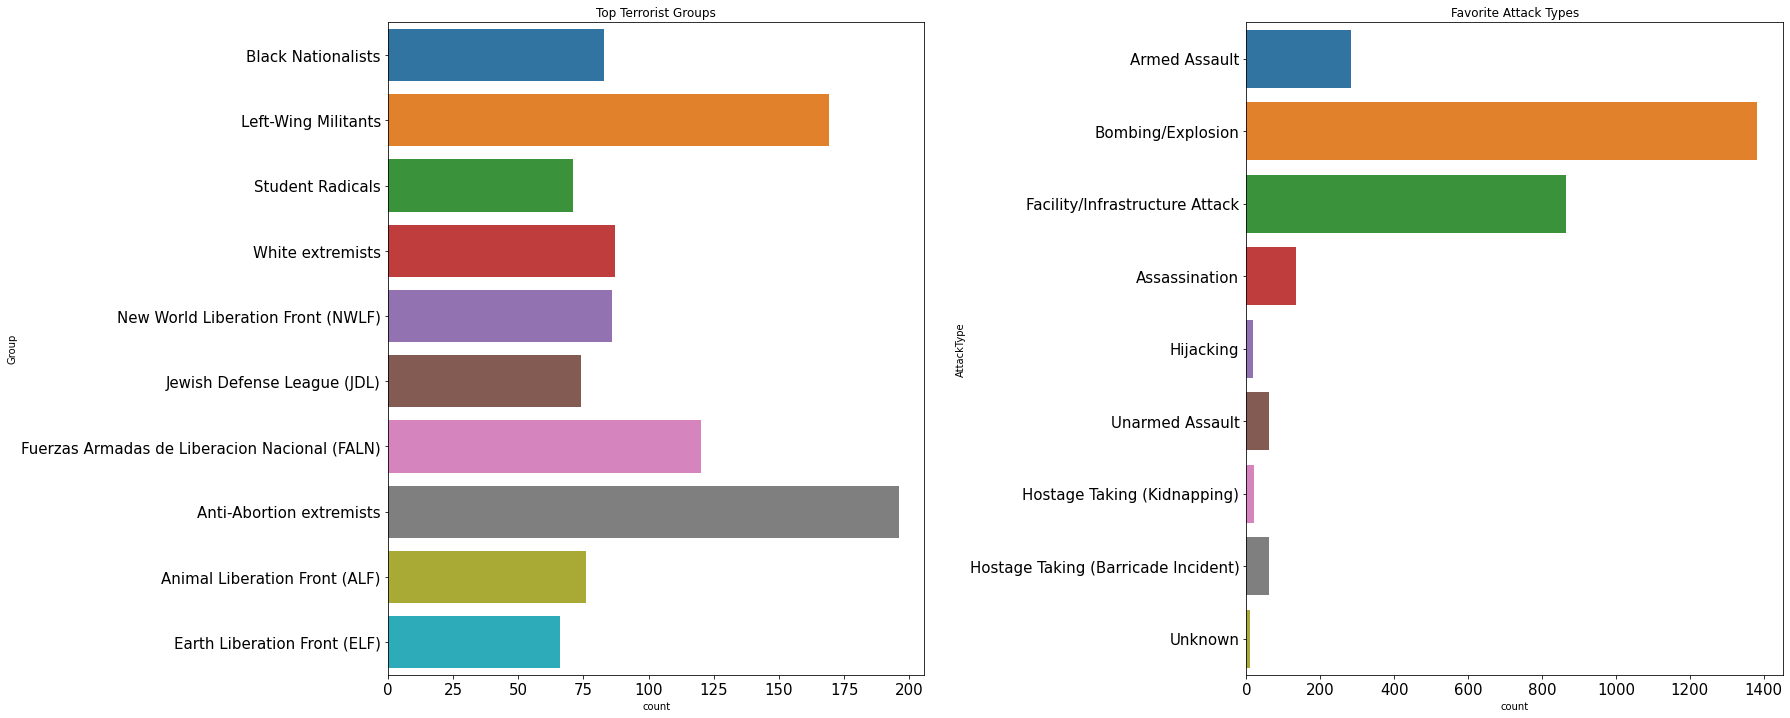

In [46]:
terror_usa=terrorism_data[terrorism_data['Country']=='United States']

f,ax=plt.subplots(1,2,figsize=(25,12))
usa_groups=terror_usa['Group'].value_counts()[1:11].index
usa_groups=terror_usa[terror_usa['Group'].isin(usa_groups)]
sns.countplot(y='Group',data=usa_groups,ax=ax[0])
sns.countplot(y='AttackType',data=terror_usa,ax=ax[1])
plt.subplots_adjust(hspace=0.3,wspace=0.6)
ax[0].set_title('Top Terrorist Groups')
ax[1].set_title('Favorite Attack Types')
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()